https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras

# Import thư viện

In [ ]:
from tensorflow.keras.utils import plot_model
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive
%ls 'Datadeep'

/content/drive/MyDrive
Datadeep@


# Gán nhãn dữ liệu

In [ ]:
class_names = ['pencil', 'eraser', 'ballpoint', 'marker']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

# Load dữ liệu

In [ ]:
def load_data():
    
    datasets = ['/content/drive/MyDrive/Datadeep/Train','/content/drive/MyDrive/Datadeep/Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

# Train, test dữ liệu

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading /content/drive/MyDrive/Datadeep/Train


100%|██████████| 240/240 [00:16<00:00, 14.29it/s]


Loading /content/drive/MyDrive/Datadeep/Test


100%|██████████| 60/60 [00:42<00:00,  1.43it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 960
Number of testing examples: 240
Each image is of size: (224, 224)


Nhận xét
* Số ví dụ huấn luyện: 960
* Số ví dụ thử nghiệm: 240
* Mỗi ảnh có kích thước: (224, 224)

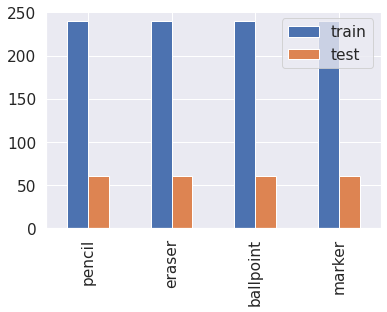

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

# Phần trăm từng loại trong dữ liệu

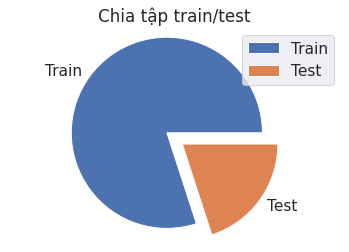

In [ ]:

y = np.array([80,20])

mylabels = ["Train", "Test"]
myexplode = [0.2, 0]
plt.pie(y, labels = mylabels,explode = myexplode)
plt.axis('equal')
plt.title('Chia tập train/test')
plt.legend()
plt.show()

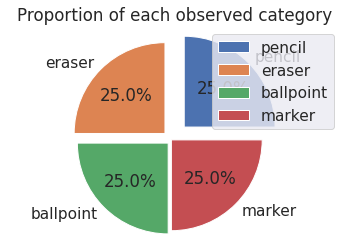

In [ ]:
plt.pie(train_counts,
        explode=(0.2, 0.1, 0.05, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Hiển thị ảnh ngẫu nhiên và nhãn tương ứng

In [ ]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

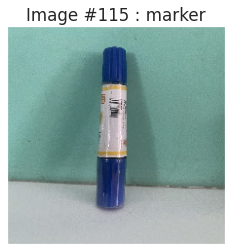

In [ ]:
display_random_image(class_names, train_images, train_labels)

# Một số ảnh ví dụ trong tập dữ liệu

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

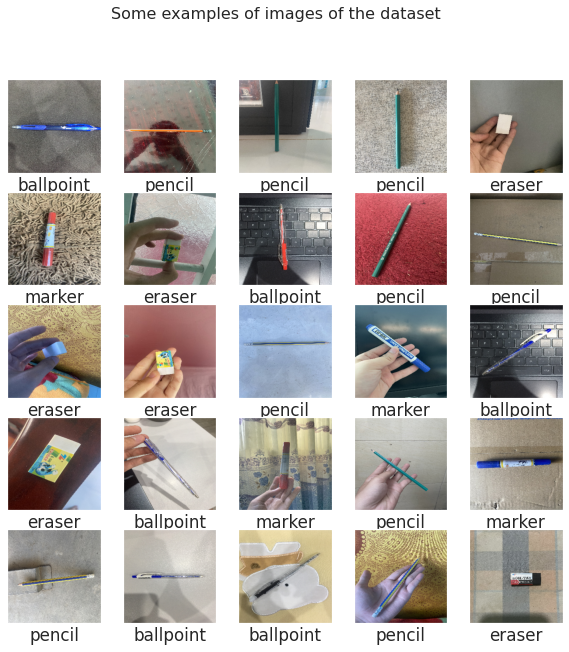

In [ ]:
display_examples(class_names, train_images, train_labels)

#CNN MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
6/6 [==============================] - 11s 283ms/step - loss: 5.1502 - accuracy: 0.2904 - val_loss: 2.7111 - val_accuracy: 0.3750
Epoch 2/30
6/6 [==============================] - 1s 175ms/step - loss: 1.7525 - accuracy: 0.2852 - val_loss: 1.4719 - val_accuracy: 0.3021
Epoch 3/30
6/6 [==============================] - 1s 176ms/step - loss: 1.3599 - accuracy: 0.3490 - val_loss: 1.2617 - val_accuracy: 0.5104
Epoch 4/30
6/6 [==============================] - 1s 177ms/step - loss: 1.1011 - accuracy: 0.5260 - val_loss: 1.1516 - val_accuracy: 0.5208
Epoch 5/30
6/6 [==============================] - 1s 172ms/step - loss: 0.8853 - accuracy: 0.7031 - val_loss: 1.0254 - val_accuracy: 0.5417
Epoch 6/30
6/6 [==============================] - 1s 174ms/step - loss: 0.7249 - accuracy: 0.7240 - val_loss: 0.9879 - val_accuracy: 0.5625
Epoch 7/30
6/6 [==============================] - 1s 173ms/step - loss: 0.5732 - accuracy: 0.8086 - val_loss: 0.8655 - val_accuracy: 0.6354
Epoch 8/30
6/6 [===

## Plot the Accuracy Curves

Text(0.5, 1.0, 'Accuracy Curves')

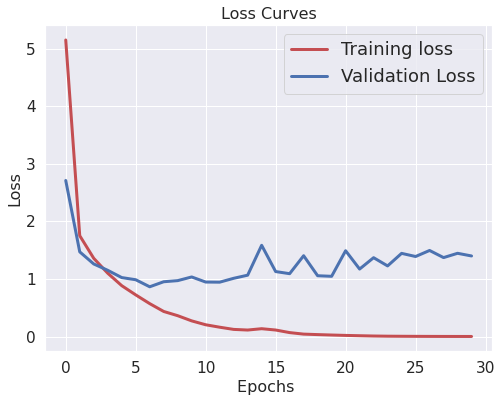

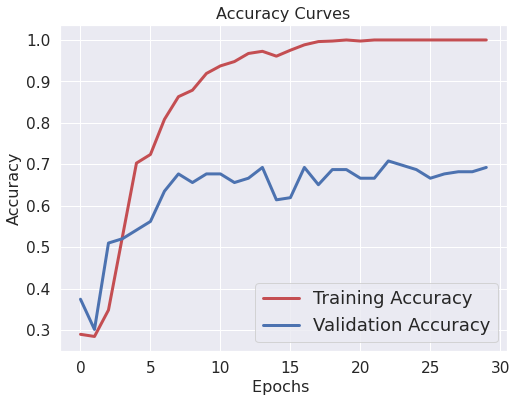

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)



    

In [ ]:
test_loss = model.evaluate(test_images, test_labels)


8/8 [==============================] - 0s 37ms/step - loss: 1.3529 - accuracy: 0.6500


8/8 [==============================] - 0s 18ms/step


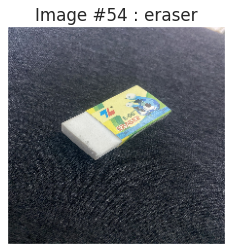

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

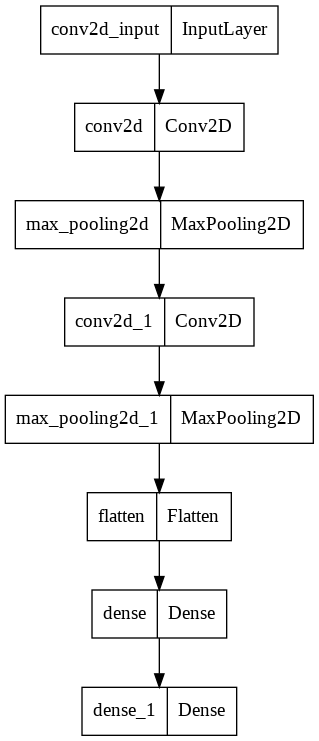

In [ ]:
plot_model(model, to_file='model.png')

## Một số ảnh được gán nhãn sai

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

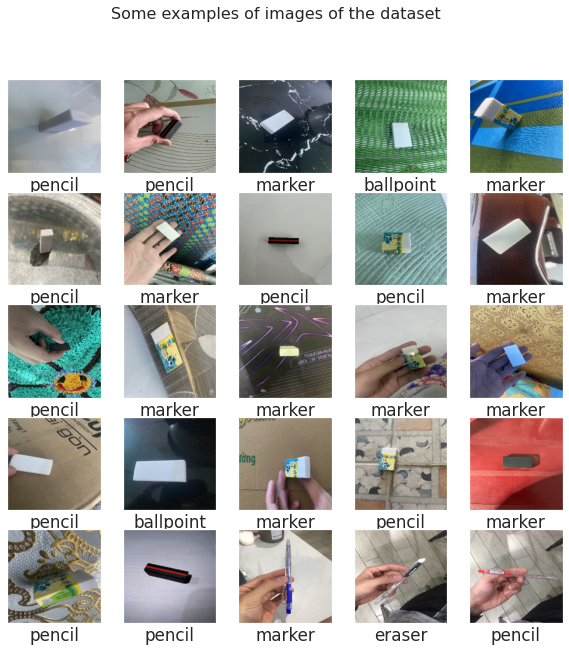

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

## Ma trận nhầm lẫn (Confusion matrix)

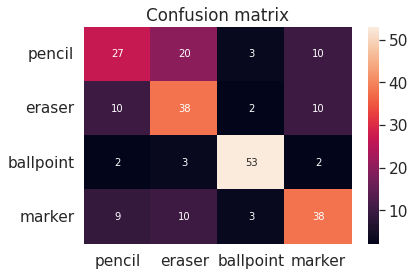

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

#Feature extraction with VGG ImageNet

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

8/8 [==============================] - 3s 365ms/step


In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

#PCA Projection

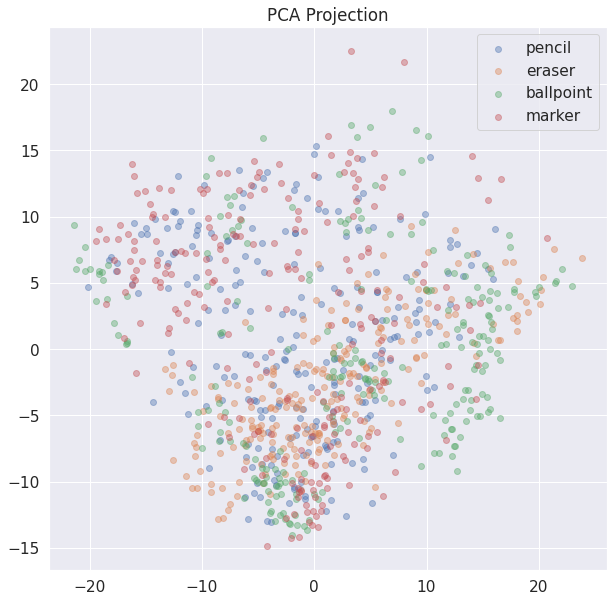

In [ ]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
6/6 [==============================] - 1s 40ms/step - loss: 3.0591 - accuracy: 0.3177 - val_loss: 2.3123 - val_accuracy: 0.3125
Epoch 2/15
6/6 [==============================] - 0s 17ms/step - loss: 1.2174 - accuracy: 0.5872 - val_loss: 1.0509 - val_accuracy: 0.5885
Epoch 3/15
6/6 [==============================] - 0s 16ms/step - loss: 0.5906 - accuracy: 0.7799 - val_loss: 0.5383 - val_accuracy: 0.8281
Epoch 4/15
6/6 [==============================] - 0s 14ms/step - loss: 0.3663 - accuracy: 0.8672 - val_loss: 0.2466 - val_accuracy: 0.9375
Epoch 5/15
6/6 [==============================] - 0s 13ms/step - loss: 0.1880 - accuracy: 0.9479 - val_loss: 0.2515 - val_accuracy: 0.9062
Epoch 6/15
6/6 [==============================] - 0s 13ms/step - loss: 0.1239 - accuracy: 0.9740 - val_loss: 0.2027 - val_accuracy: 0.9583
Epoch 7/15
6/6 [==============================] - 0s 15ms/step - loss: 0.1030 - accuracy: 0.9857 - val_loss: 0.1609 - val_accuracy: 0.9740
Epoch 8/15
6/6 [===========

Text(0.5, 1.0, 'Accuracy Curves')

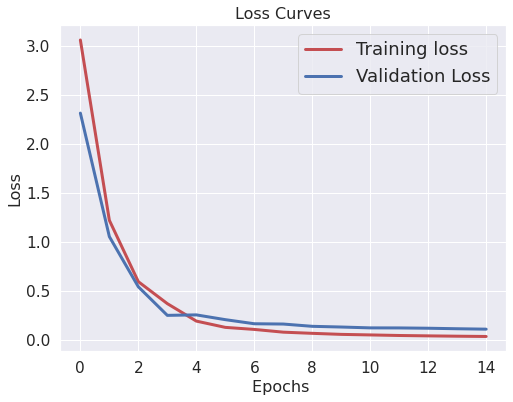

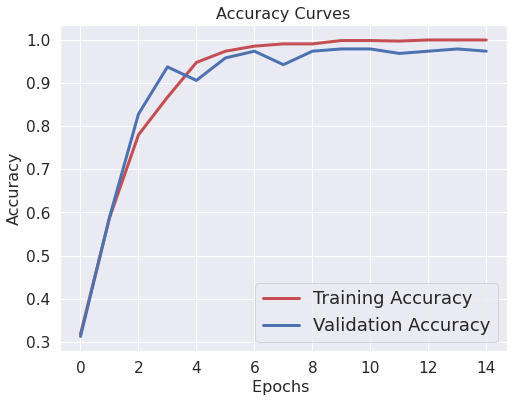

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

#Ensemble Neural Networks

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)


8/8 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9792


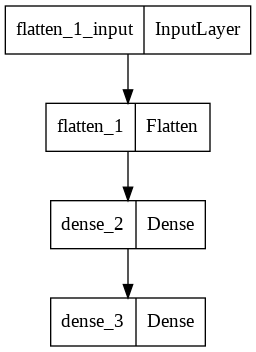

In [ ]:
plot_model(model2, to_file='model2.png')

In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [ ]:
histories = []
for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
6/6 [==============================] - 0s 36ms/step - loss: 4.7956 - accuracy: 0.2923 - val_loss: 3.1221 - val_accuracy: 0.2857
Epoch 2/10
6/6 [==============================] - 0s 12ms/step - loss: 1.5541 - accuracy: 0.5355 - val_loss: 1.1302 - val_accuracy: 0.6104
Epoch 3/10
6/6 [==============================] - 0s 16ms/step - loss: 0.5073 - accuracy: 0.8408 - val_loss: 0.5047 - val_accuracy: 0.7792
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 0.2693 - accuracy: 0.9146 - val_loss: 0.1557 - val_accuracy: 0.9870
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 0.1151 - accuracy: 0.9754 - val_loss: 0.2008 - val_accuracy: 0.9610
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0771 - accuracy: 0.9797 - val_loss: 0.1152 - val_accuracy: 0.9740
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9740
Epoch 8/10
6/6 [===========

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

8/8 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9791666666666666


#Fine Tuning VGG ImageNet

In [ ]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

8/8 [==============================] - 1s 132ms/step


In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (14, 14, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 14, 14, 512)]     0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          294976    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0   

In [ ]:
history3 = new_model.fit(train_features, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
6/6 [==============================] - 3s 221ms/step - loss: 2.2240 - accuracy: 0.3125 - val_loss: 1.3328 - val_accuracy: 0.4635
Epoch 2/20
6/6 [==============================] - 1s 138ms/step - loss: 1.5078 - accuracy: 0.3034 - val_loss: 1.3237 - val_accuracy: 0.2969
Epoch 3/20
6/6 [==============================] - 1s 138ms/step - loss: 1.1775 - accuracy: 0.4245 - val_loss: 0.9660 - val_accuracy: 0.6146
Epoch 4/20
6/6 [==============================] - 1s 140ms/step - loss: 0.9178 - accuracy: 0.6016 - val_loss: 0.7956 - val_accuracy: 0.6927
Epoch 5/20
6/6 [==============================] - 1s 140ms/step - loss: 0.6579 - accuracy: 0.7279 - val_loss: 0.5874 - val_accuracy: 0.7448
Epoch 6/20
6/6 [==============================] - 1s 141ms/step - loss: 0.4561 - accuracy: 0.8099 - val_loss: 0.5306 - val_accuracy: 0.7812
Epoch 7/20
6/6 [==============================] - 1s 138ms/step - loss: 0.3567 - accuracy: 0.8372 - val_loss: 0.4490 - val_accuracy: 0.8125
Epoch 8/20
6/6 [====

Text(0.5, 1.0, 'Accuracy Curves')

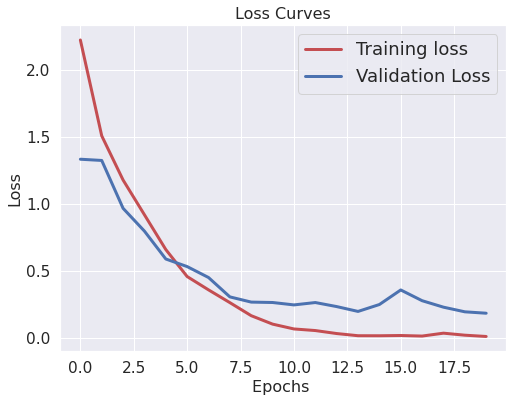

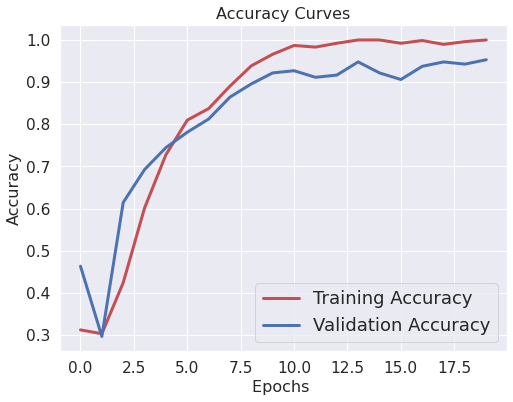

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history3.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

8/8 [==============================] - 0s 22ms/step
Accuracy : 0.9208333333333333


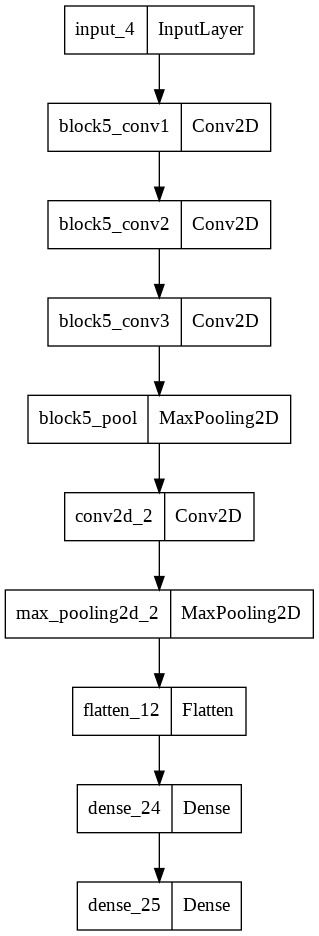

In [ ]:
plot_model(new_model, to_file='new_mode.png')

#MLP

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape =(224, 224, 3)))
model.add(tf.keras.layers.Dense(256, activation='relu' ))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 150528)            0         
                                                                 
 dense_26 (Dense)            (None, 256)               38535424  
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 4)                 260       
                                                                 
Total params: 38,576,836
Trainable params: 38,576,836
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images,train_labels, batch_size=128, epochs=20,validation_data =(train_images,train_labels) )



Epoch 1/20
8/8 [==============================] - 3s 284ms/step - loss: 46.1670 - accuracy: 0.2427 - val_loss: 54.7240 - val_accuracy: 0.2500
Epoch 2/20
8/8 [==============================] - 1s 139ms/step - loss: 32.7158 - accuracy: 0.2552 - val_loss: 26.1423 - val_accuracy: 0.2500
Epoch 3/20
8/8 [==============================] - 1s 94ms/step - loss: 22.8420 - accuracy: 0.2427 - val_loss: 7.5145 - val_accuracy: 0.2500
Epoch 4/20
8/8 [==============================] - 1s 94ms/step - loss: 24.2170 - accuracy: 0.2594 - val_loss: 14.7330 - val_accuracy: 0.3031
Epoch 5/20
8/8 [==============================] - 1s 91ms/step - loss: 11.6542 - accuracy: 0.2698 - val_loss: 7.3114 - val_accuracy: 0.2948
Epoch 6/20
8/8 [==============================] - 1s 97ms/step - loss: 8.3488 - accuracy: 0.3302 - val_loss: 6.0129 - val_accuracy: 0.3021
Epoch 7/20
8/8 [==============================] - 1s 95ms/step - loss: 4.9069 - accuracy: 0.3542 - val_loss: 6.9413 - val_accuracy: 0.2906
Epoch 8/20
8/8 [=

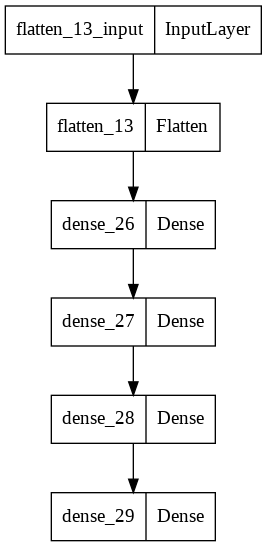

In [ ]:
plot_model(model, to_file='model.png')

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))



8/8 [==============================] - 0s 12ms/step - loss: 1.8170 - accuracy: 0.4000
Evaluation result on Test Data : Loss = 1.8170130252838135, accuracy = 0.4000000059604645


Text(0.5, 1.0, 'Accuracy Curves')

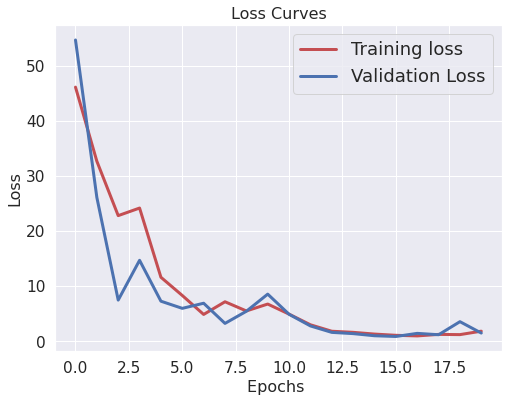

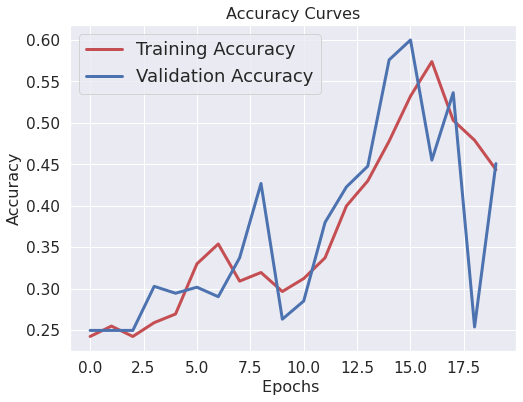

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)



8/8 [==============================] - 0s 9ms/step


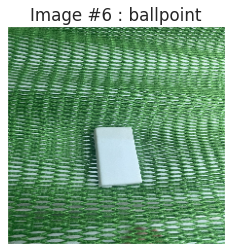

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
rounded_labels= np.argmax(test_labels, axis=1)
display_random_image(class_names, test_images, pred_labels)



In [ ]:
from sklearn.metrics import classification_report
print("Confusion Matrix:")
print(confusion_matrix(rounded_labels, pred_labels))
print("="*80)
print("Bảng hiệu năng:")
print(classification_report(rounded_labels, pred_labels, target_names=class_names))

Confusion Matrix:
[[ 0 33  3 24]
 [ 0 35  2 23]
 [ 0  7 14 39]
 [ 0 11  2 47]]
Bảng hiệu năng:
              precision    recall  f1-score   support

      pencil       0.00      0.00      0.00        60
      eraser       0.41      0.58      0.48        60
   ballpoint       0.67      0.23      0.35        60
      marker       0.35      0.78      0.49        60

    accuracy                           0.40       240
   macro avg       0.36      0.40      0.33       240
weighted avg       0.36      0.40      0.33       240



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PRETRAIN WITH MOBILENET

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
pretrained_base_mobilenet =tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
    
)


17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers
model = keras.Sequential([
    pretrained_base_mobilenet,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 1000)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               128128    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 4)                 260       
                                                                 
Total params: 4,390,508
Trainable params: 4,368,620
Non-trainable params: 21,888
______________________________________

In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1, )

            
            

Epoch 1/30
30/30 [==============================] - 11s 254ms/step - loss: 1.2518 - accuracy: 0.7437 - val_loss: 1.1329 - val_accuracy: 0.7260
Epoch 2/30
30/30 [==============================] - 7s 228ms/step - loss: 0.9243 - accuracy: 0.8104 - val_loss: 1.4243 - val_accuracy: 0.4250
Epoch 3/30
30/30 [==============================] - 7s 233ms/step - loss: 0.8870 - accuracy: 0.7208 - val_loss: 1.0985 - val_accuracy: 0.5833
Epoch 4/30
30/30 [==============================] - 7s 234ms/step - loss: 0.6890 - accuracy: 0.7927 - val_loss: 1.3009 - val_accuracy: 0.5729
Epoch 5/30
30/30 [==============================] - 7s 232ms/step - loss: 0.3547 - accuracy: 0.9229 - val_loss: 1.0767 - val_accuracy: 0.7125
Epoch 6/30
30/30 [==============================] - 7s 231ms/step - loss: 0.3958 - accuracy: 0.9062 - val_loss: 2.1299 - val_accuracy: 0.4854
Epoch 7/30
30/30 [==============================] - 7s 237ms/step - loss: 0.4785 - accuracy: 0.8854 - val_loss: 2.1803 - val_accuracy: 0.4000
Epoch

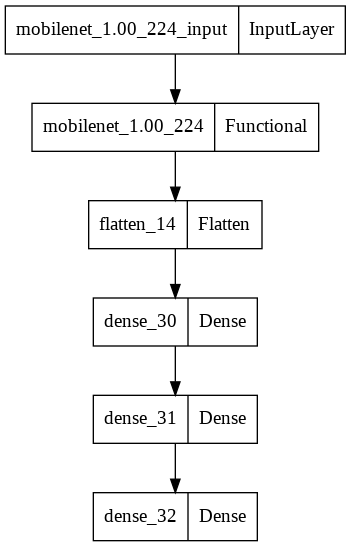

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

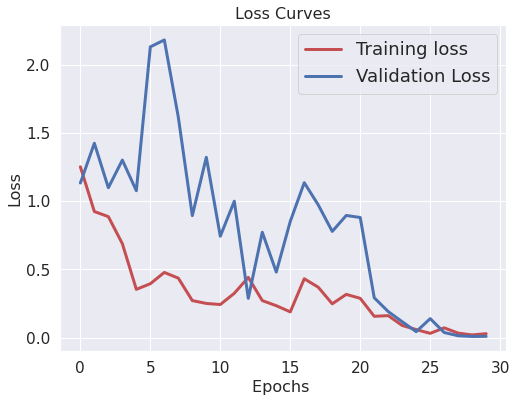

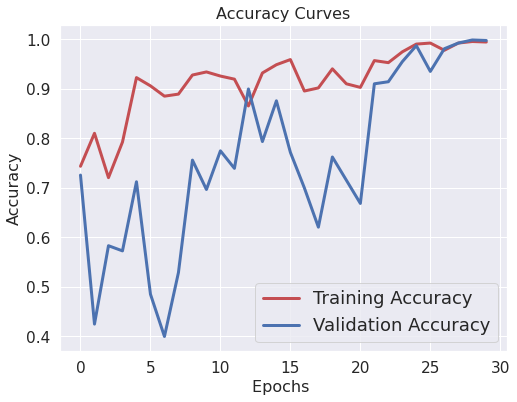

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 1s 85ms/step - loss: 0.0915 - accuracy: 0.9708
Evaluation result on Test Data : Loss = 0.09146862477064133, accuracy = 0.9708333611488342


# PRETRAIN WITH MOBILENET2


In [ ]:
pretrained_base_mobilenet2 = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
    
)

14536120/14536120 [==============================] - 1s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_mobilenet2,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 flatten_15 (Flatten)        (None, 1000)              0         
                                                                 
 dense_33 (Dense)            (None, 128)               128128    
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 4)                 260       
                                                                 
Total params: 3,675,628
Trainable params: 3,641,516
Non-trainable params: 34,112
______________________________________

In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 14s 297ms/step - loss: 1.2877 - accuracy: 0.7260 - val_loss: 1.1659 - val_accuracy: 0.7250
Epoch 2/30
30/30 [==============================] - 8s 256ms/step - loss: 0.9525 - accuracy: 0.7740 - val_loss: 1.5737 - val_accuracy: 0.3490
Epoch 3/30
30/30 [==============================] - 8s 255ms/step - loss: 0.7274 - accuracy: 0.7448 - val_loss: 2.1294 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 8s 254ms/step - loss: 0.6472 - accuracy: 0.7854 - val_loss: 2.0118 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 8s 254ms/step - loss: 0.7057 - accuracy: 0.7688 - val_loss: 2.8933 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 8s 259ms/step - loss: 0.4158 - accuracy: 0.8875 - val_loss: 3.2796 - val_accuracy: 0.2500
Epoch 7/30
30/30 [==============================] - 8s 261ms/step - loss: 0.3119 - accuracy: 0.9187 - val_loss: 3.5327 - val_accuracy: 0.2500
Epoch

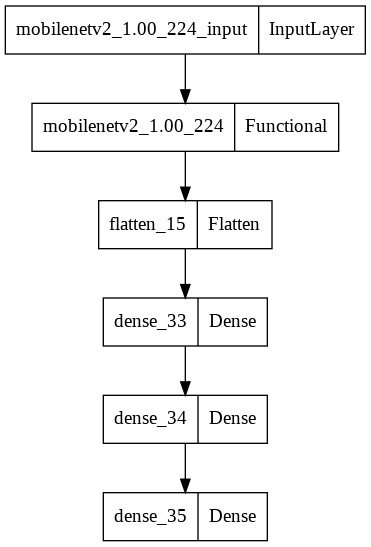

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

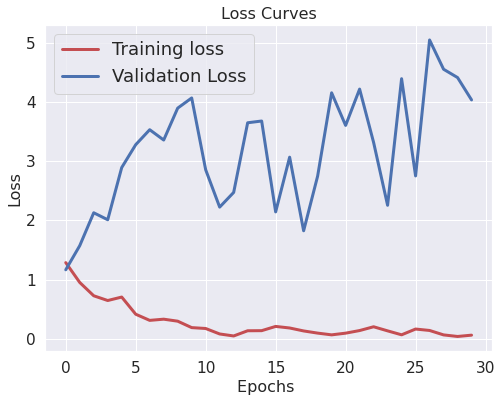

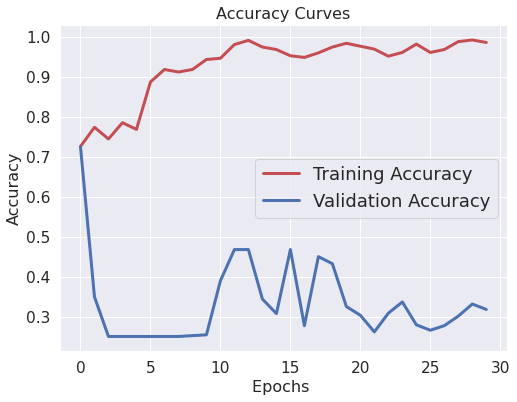

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 1s 88ms/step - loss: 4.1134 - accuracy: 0.3083
Evaluation result on Test Data : Loss = 4.113369941711426, accuracy = 0.3083333373069763


# PRETRAIN WITH DESNET121

In [ ]:
pretrained_base_desnet121 = tf.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

33188688/33188688 [==============================] - 1s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_desnet121,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
    ])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1000)              8062504   
                                                                 
 flatten_16 (Flatten)        (None, 1000)              0         
                                                                 
 dense_36 (Dense)            (None, 128)               128128    
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 4)                 260       
                                                                 
Total params: 8,199,148
Trainable params: 8,115,500
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 29s 522ms/step - loss: 1.2756 - accuracy: 0.7073 - val_loss: 1.4320 - val_accuracy: 0.2604
Epoch 2/30
30/30 [==============================] - 14s 457ms/step - loss: 0.9579 - accuracy: 0.7479 - val_loss: 1.8385 - val_accuracy: 0.2719
Epoch 3/30
30/30 [==============================] - 14s 460ms/step - loss: 0.9822 - accuracy: 0.6510 - val_loss: 1.4873 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 14s 457ms/step - loss: 0.8359 - accuracy: 0.7146 - val_loss: 1.9242 - val_accuracy: 0.2510
Epoch 5/30
30/30 [==============================] - 14s 455ms/step - loss: 0.6881 - accuracy: 0.7594 - val_loss: 2.0593 - val_accuracy: 0.3375
Epoch 6/30
30/30 [==============================] - 16s 533ms/step - loss: 0.5425 - accuracy: 0.8344 - val_loss: 1.2508 - val_accuracy: 0.6219
Epoch 7/30
30/30 [==============================] - 14s 454ms/step - loss: 0.4639 - accuracy: 0.8615 - val_loss: 0.9997 - val_accuracy: 0.7115

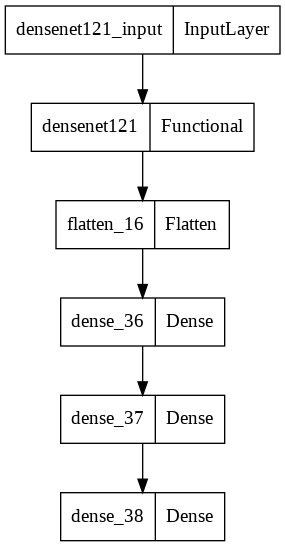

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

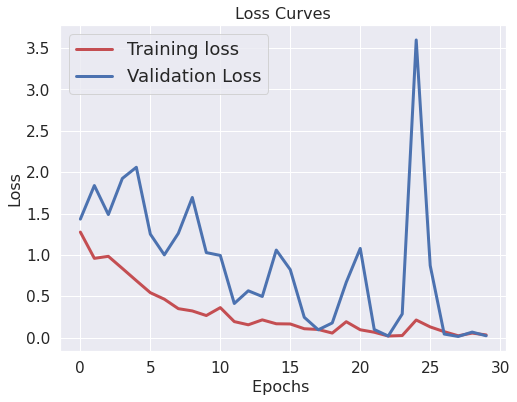

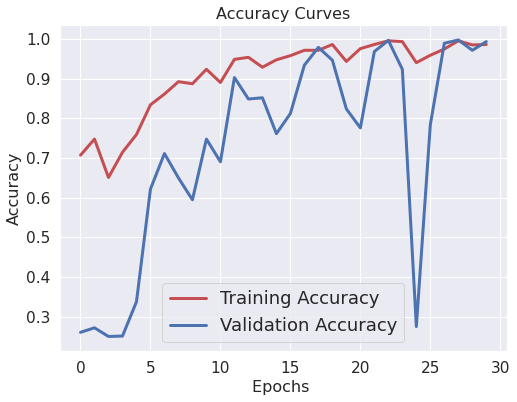

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 3s 241ms/step - loss: 0.1039 - accuracy: 0.9750
Evaluation result on Test Data : Loss = 0.10385952889919281, accuracy = 0.9750000238418579


# PRETRAIN WITH DESNET169

In [ ]:
pretrained_base_desnet169 = tf.keras.applications.DenseNet169(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

58541896/58541896 [==============================] - 2s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_desnet169,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=["accuracy"] # 
  )
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1000)              14307880  
                                                                 
 flatten_17 (Flatten)        (None, 1000)              0         
                                                                 
 dense_39 (Dense)            (None, 128)               128128    
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 4)                 260       
                                                                 
Total params: 14,444,524
Trainable params: 14,286,124
Non-trainable params: 158,400
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 37s 708ms/step - loss: 1.3004 - accuracy: 0.6052 - val_loss: 1.3875 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 16s 554ms/step - loss: 1.1300 - accuracy: 0.6104 - val_loss: 1.5497 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 17s 560ms/step - loss: 1.1023 - accuracy: 0.5906 - val_loss: 1.7671 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 18s 611ms/step - loss: 0.9260 - accuracy: 0.6740 - val_loss: 1.7009 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 16s 549ms/step - loss: 0.7447 - accuracy: 0.7417 - val_loss: 1.9648 - val_accuracy: 0.2802
Epoch 6/30
30/30 [==============================] - 18s 610ms/step - loss: 0.7302 - accuracy: 0.7365 - val_loss: 2.2384 - val_accuracy: 0.2531
Epoch 7/30
30/30 [==============================] - 16s 552ms/step - loss: 0.7207 - accuracy: 0.7708 - val_loss: 2.5442 - val_accuracy: 0.2500

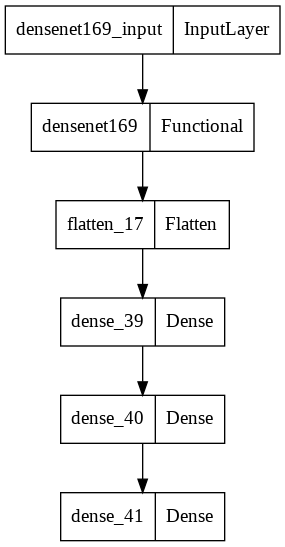

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

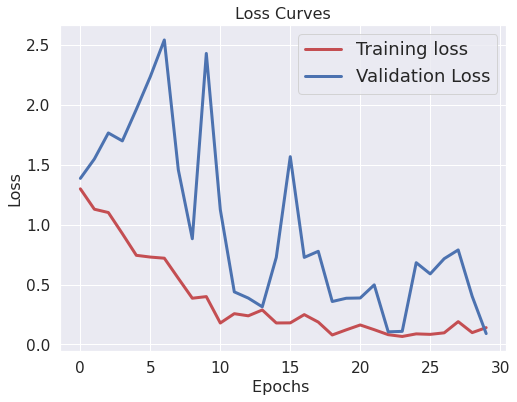

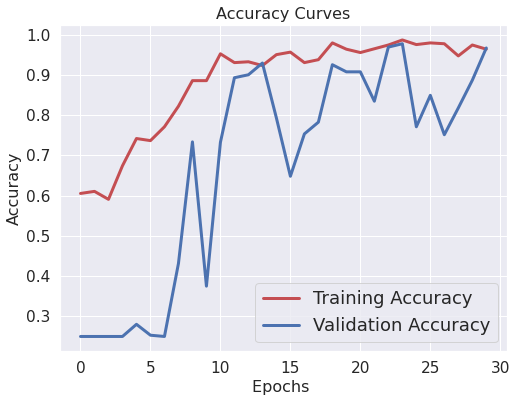

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 4s 187ms/step - loss: 0.2241 - accuracy: 0.9167
Evaluation result on Test Data : Loss = 0.22414228320121765, accuracy = 0.9166666865348816


# PRETRAIN WITH DESNET201

In [ ]:
pretrained_base_desnet201 = tf.keras.applications.DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

82524592/82524592 [==============================] - 3s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_desnet201,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1000)              20242984  
                                                                 
 flatten_18 (Flatten)        (None, 1000)              0         
                                                                 
 dense_42 (Dense)            (None, 128)               128128    
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 4)                 260       
                                                                 
Total params: 20,379,628
Trainable params: 20,150,572
Non-trainable params: 229,056
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 45s 837ms/step - loss: 1.2917 - accuracy: 0.6719 - val_loss: 1.3987 - val_accuracy: 0.2458
Epoch 2/30
30/30 [==============================] - 22s 739ms/step - loss: 1.0894 - accuracy: 0.6448 - val_loss: 1.5479 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 22s 737ms/step - loss: 0.9156 - accuracy: 0.6615 - val_loss: 1.8835 - val_accuracy: 0.2667
Epoch 4/30
30/30 [==============================] - 21s 703ms/step - loss: 0.7851 - accuracy: 0.7385 - val_loss: 2.0581 - val_accuracy: 0.2875
Epoch 5/30
30/30 [==============================] - 22s 735ms/step - loss: 0.8025 - accuracy: 0.7312 - val_loss: 1.8120 - val_accuracy: 0.2552
Epoch 6/30
30/30 [==============================] - 22s 735ms/step - loss: 0.7735 - accuracy: 0.7302 - val_loss: 2.6660 - val_accuracy: 0.3250
Epoch 7/30
30/30 [==============================] - 22s 734ms/step - loss: 0.5205 - accuracy: 0.8333 - val_loss: 1.5426 - val_accuracy: 0.5031

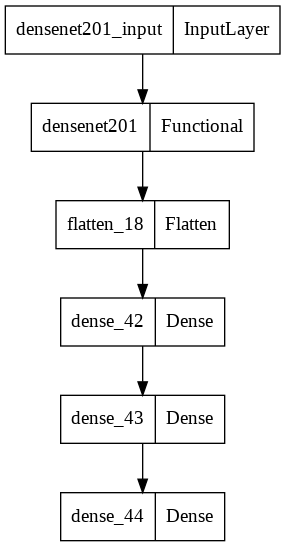

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

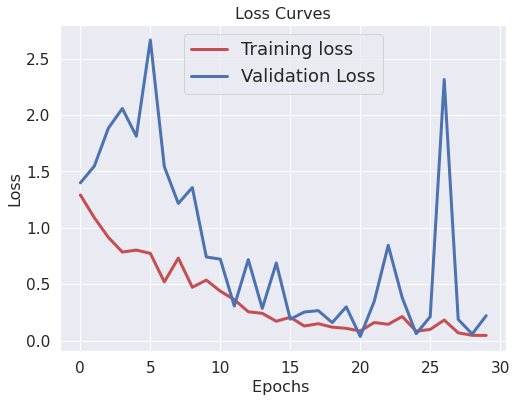

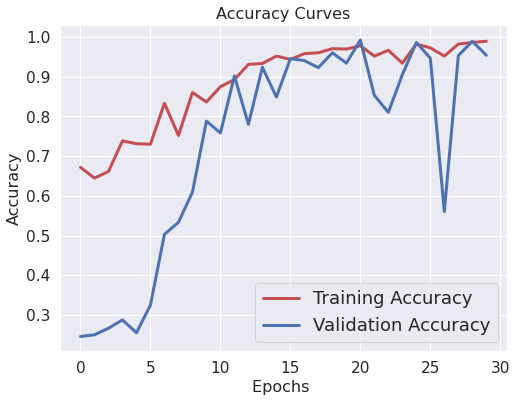

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 5s 232ms/step - loss: 0.2871 - accuracy: 0.9167
Evaluation result on Test Data : Loss = 0.28714558482170105, accuracy = 0.9166666865348816


# PRETRAIN WITH VGG19

In [ ]:
pretrained_base_VGG19 = tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

574710816/574710816 [==============================] - 17s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_VGG19,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1000)              143667240 
                                                                 
 flatten_19 (Flatten)        (None, 1000)              0         
                                                                 
 dense_45 (Dense)            (None, 128)               128128    
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 4)                 260       
                                                                 
Total params: 143,803,884
Trainable params: 143,803,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 26s 715ms/step - loss: 1.3890 - accuracy: 0.2448 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 26s 862ms/step - loss: 1.3871 - accuracy: 0.2458 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 21s 690ms/step - loss: 1.3873 - accuracy: 0.2500 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 20s 689ms/step - loss: 1.3883 - accuracy: 0.2417 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 25s 857ms/step - loss: 1.3872 - accuracy: 0.2375 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 21s 692ms/step - loss: 1.3868 - accuracy: 0.2396 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/30
30/30 [==============================] - 21s 695ms/step - loss: 1.3875 - accuracy: 0.2479 - val_loss: 1.3863 - val_accuracy: 0.2500

Text(0.5, 1.0, 'Accuracy Curves')

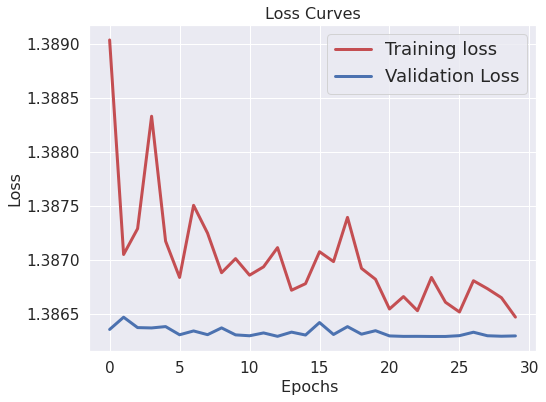

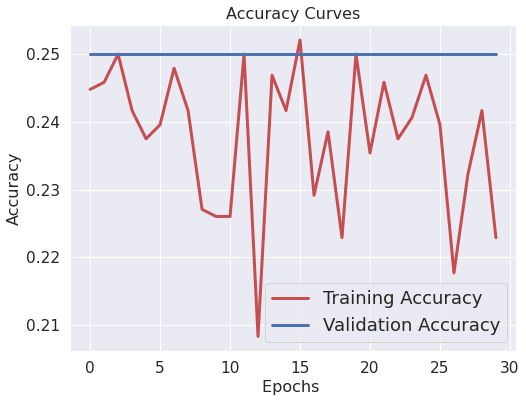

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

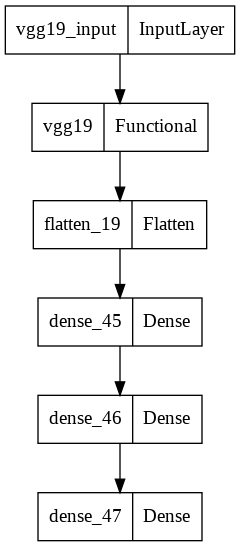

In [ ]:
plot_model(model, to_file='model.png')

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 2s 171ms/step - loss: 1.3863 - accuracy: 0.2500
Evaluation result on Test Data : Loss = 1.3863013982772827, accuracy = 0.25


#PRETRAIN WITH RESNET50

In [ ]:
pretrained_base_ResNet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    
)

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_ResNet50,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
    ])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten_20 (Flatten)        (None, 1000)              0         
                                                                 
 dense_48 (Dense)            (None, 128)               128128    
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dense_50 (Dense)            (None, 4)                 260       
                                                                 
Total params: 25,773,356
Trainable params: 25,720,236
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 20s 460ms/step - loss: 1.3091 - accuracy: 0.5792 - val_loss: 1.4340 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 13s 421ms/step - loss: 1.3526 - accuracy: 0.3635 - val_loss: 1.4519 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 13s 424ms/step - loss: 1.2791 - accuracy: 0.3927 - val_loss: 1.3934 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 13s 426ms/step - loss: 1.2302 - accuracy: 0.4094 - val_loss: 1.6017 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 15s 500ms/step - loss: 1.2663 - accuracy: 0.3771 - val_loss: 1.6496 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 15s 497ms/step - loss: 1.1425 - accuracy: 0.4500 - val_loss: 1.8092 - val_accuracy: 0.2510
Epoch 7/30
30/30 [==============================] - 12s 417ms/step - loss: 1.1609 - accuracy: 0.4479 - val_loss: 1.6991 - val_accuracy: 0.2771

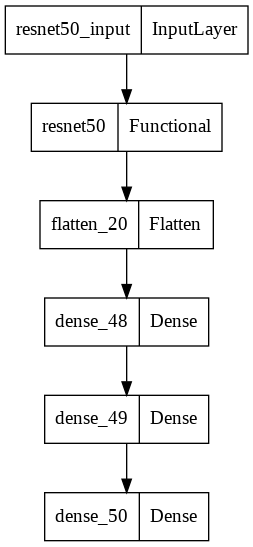

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

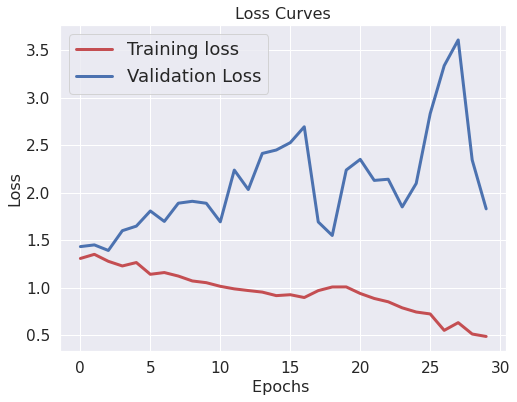

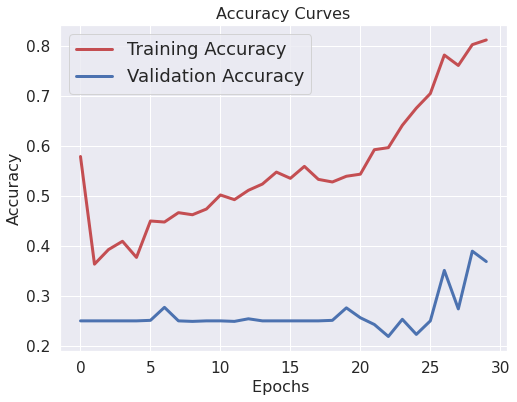

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 2s 160ms/step - loss: 1.9129 - accuracy: 0.3458
Evaluation result on Test Data : Loss = 1.9128928184509277, accuracy = 0.34583333134651184


# PRETRAIN WITH RESNET50V2

In [ ]:
pretrained_base_ResNet50V2 = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

102869336/102869336 [==============================] - 4s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_ResNet50V2,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 flatten_21 (Flatten)        (None, 1000)              0         
                                                                 
 dense_51 (Dense)            (None, 128)               128128    
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 4)                 260       
                                                                 
Total params: 25,750,444
Trainable params: 25,705,004
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 21s 498ms/step - loss: 1.3205 - accuracy: 0.5802 - val_loss: 1.4150 - val_accuracy: 0.2135
Epoch 2/30
30/30 [==============================] - 14s 461ms/step - loss: 1.2463 - accuracy: 0.5146 - val_loss: 1.4782 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 14s 460ms/step - loss: 1.1647 - accuracy: 0.5219 - val_loss: 1.5791 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 14s 458ms/step - loss: 1.1163 - accuracy: 0.4854 - val_loss: 1.7710 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 11s 369ms/step - loss: 1.1229 - accuracy: 0.4906 - val_loss: 1.4713 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 11s 368ms/step - loss: 1.1183 - accuracy: 0.4729 - val_loss: 1.4295 - val_accuracy: 0.2573
Epoch 7/30
30/30 [==============================] - 13s 456ms/step - loss: 1.0161 - accuracy: 0.5479 - val_loss: 2.4606 - val_accuracy: 0.2490

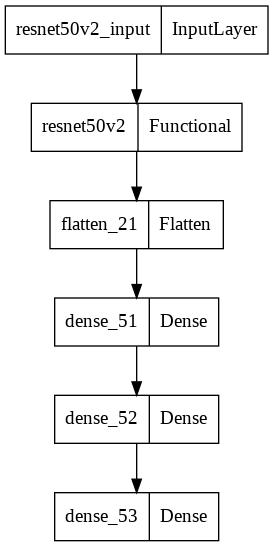

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

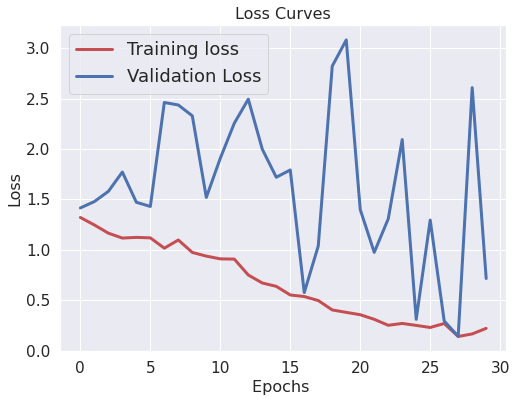

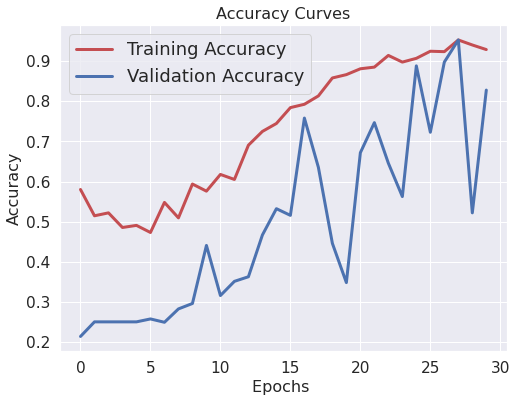

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 2s 144ms/step - loss: 0.9652 - accuracy: 0.7083
Evaluation result on Test Data : Loss = 0.9652080535888672, accuracy = 0.7083333134651184


# PRETRAIN WITH RESNET101

In [ ]:
pretrained_base_ResNet101 = tf.keras.applications.ResNet101(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    
)

179648224/179648224 [==============================] - 6s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_ResNet101,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1000)              44707176  
                                                                 
 flatten_22 (Flatten)        (None, 1000)              0         
                                                                 
 dense_54 (Dense)            (None, 128)               128128    
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 4)                 260       
                                                                 
Total params: 44,843,820
Trainable params: 44,738,476
Non-trainable params: 105,344
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 34s 817ms/step - loss: 1.3760 - accuracy: 0.3750 - val_loss: 1.3953 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 21s 707ms/step - loss: 1.3864 - accuracy: 0.2812 - val_loss: 1.3927 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 21s 711ms/step - loss: 1.3782 - accuracy: 0.2729 - val_loss: 1.3871 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 21s 694ms/step - loss: 1.3414 - accuracy: 0.3385 - val_loss: 1.3916 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 21s 710ms/step - loss: 1.2873 - accuracy: 0.3948 - val_loss: 1.4214 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 21s 708ms/step - loss: 1.3771 - accuracy: 0.2760 - val_loss: 1.4046 - val_accuracy: 0.2510
Epoch 7/30
30/30 [==============================] - 21s 705ms/step - loss: 1.3064 - accuracy: 0.3365 - val_loss: 1.4526 - val_accuracy: 0.2500

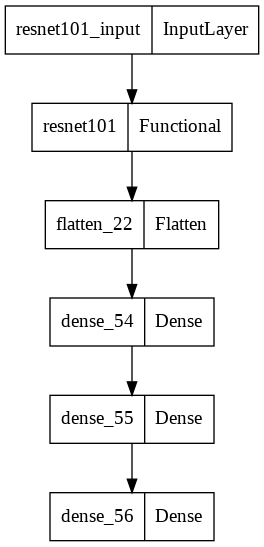

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

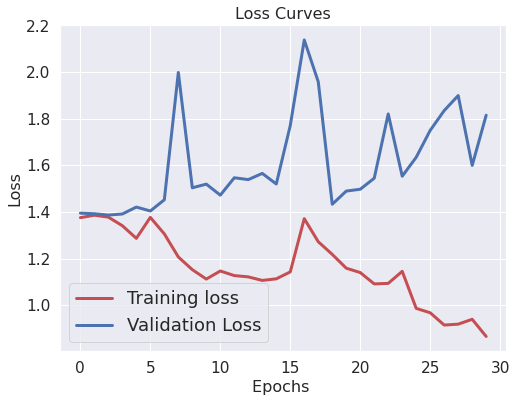

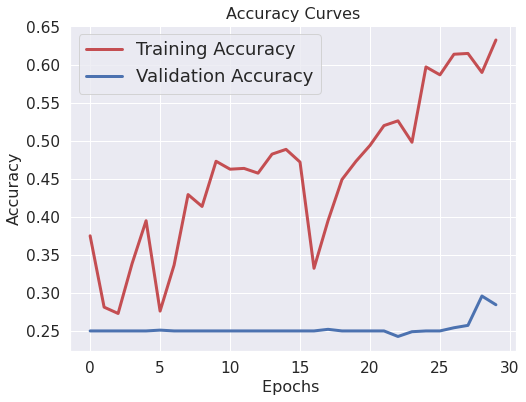

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 3s 146ms/step - loss: 1.8291 - accuracy: 0.2750
Evaluation result on Test Data : Loss = 1.8291020393371582, accuracy = 0.2750000059604645


# PRETRAIN WITH RESNET101V2

In [ ]:
pretrained_base_ResNet101V2 = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

179518384/179518384 [==============================] - 5s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_ResNet101V2,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 1000)              44675560  
                                                                 
 flatten_23 (Flatten)        (None, 1000)              0         
                                                                 
 dense_57 (Dense)            (None, 128)               128128    
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 4)                 260       
                                                                 
Total params: 44,812,204
Trainable params: 44,714,540
Non-trainable params: 97,664
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 31s 731ms/step - loss: 1.3727 - accuracy: 0.3104 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 20s 666ms/step - loss: 1.3749 - accuracy: 0.2719 - val_loss: 1.4061 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 20s 670ms/step - loss: 1.3813 - accuracy: 0.2812 - val_loss: 1.4360 - val_accuracy: 0.2552
Epoch 4/30
30/30 [==============================] - 20s 661ms/step - loss: 1.3469 - accuracy: 0.3406 - val_loss: 1.4843 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 20s 657ms/step - loss: 1.2714 - accuracy: 0.3802 - val_loss: 1.7992 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 19s 641ms/step - loss: 1.2522 - accuracy: 0.4000 - val_loss: 1.8543 - val_accuracy: 0.2510
Epoch 7/30
30/30 [==============================] - 19s 639ms/step - loss: 1.1778 - accuracy: 0.4125 - val_loss: 1.6282 - val_accuracy: 0.3552

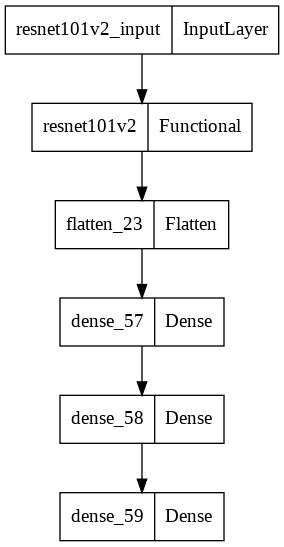

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

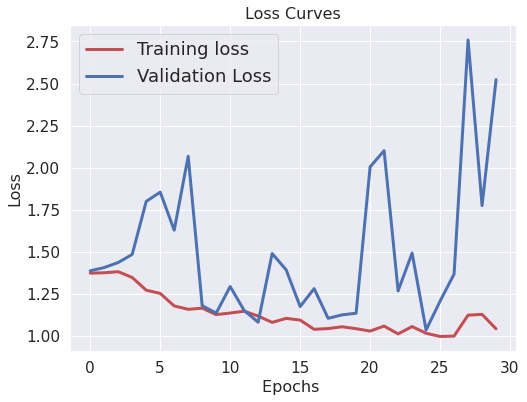

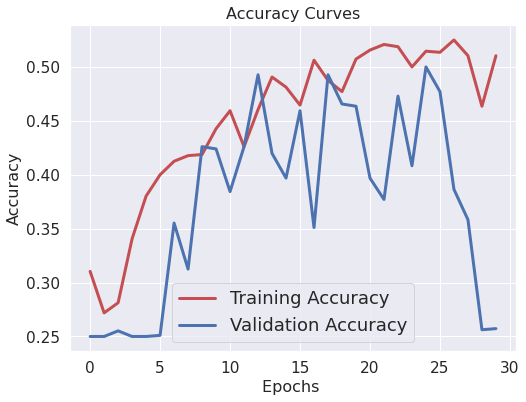

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 4s 143ms/step - loss: 2.5143 - accuracy: 0.2458
Evaluation result on Test Data : Loss = 2.5143320560455322, accuracy = 0.24583333730697632


# PRETRAIN WITH RESNET152

In [ ]:
pretrained_base_ResNet152 = tf.keras.applications.ResNet152(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    
)

242900224/242900224 [==============================] - 8s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_ResNet152,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), 
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=["accuracy"] 
  )
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1000)              60419944  
                                                                 
 flatten_24 (Flatten)        (None, 1000)              0         
                                                                 
 dense_60 (Dense)            (None, 128)               128128    
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 4)                 260       
                                                                 
Total params: 60,556,588
Trainable params: 60,405,164
Non-trainable params: 151,424
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 51s 1s/step - loss: 1.3756 - accuracy: 0.3167 - val_loss: 1.4162 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 33s 1s/step - loss: 1.3684 - accuracy: 0.3000 - val_loss: 1.4096 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 29s 982ms/step - loss: 1.3553 - accuracy: 0.3208 - val_loss: 1.3908 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 29s 991ms/step - loss: 1.3797 - accuracy: 0.2781 - val_loss: 1.4375 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 33s 1s/step - loss: 1.3567 - accuracy: 0.3167 - val_loss: 1.4720 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 33s 1s/step - loss: 1.3182 - accuracy: 0.3344 - val_loss: 1.3908 - val_accuracy: 0.2500
Epoch 7/30
30/30 [==============================] - 29s 986ms/step - loss: 1.2847 - accuracy: 0.3698 - val_loss: 1.6018 - val_accuracy: 0.2531
Epoch 8/30


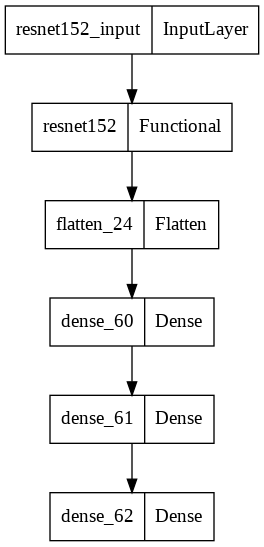

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

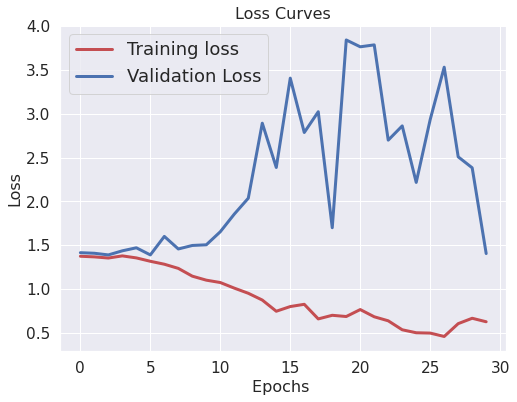

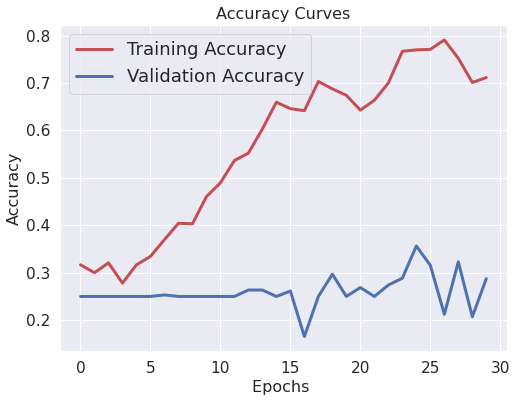

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 4s 212ms/step - loss: 1.4433 - accuracy: 0.2708
Evaluation result on Test Data : Loss = 1.4432569742202759, accuracy = 0.2708333432674408


# PRETRAIN WITH RESNET152V2

In [ ]:
pretrained_base_ResNet152V2 = tf.keras.applications.ResNet152V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

242745792/242745792 [==============================] - 8s 0us/step


In [ ]:
model = keras.Sequential([
    pretrained_base_ResNet152V2,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 1000)              60380648  
                                                                 
 flatten_25 (Flatten)        (None, 1000)              0         
                                                                 
 dense_63 (Dense)            (None, 128)               128128    
                                                                 
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dense_65 (Dense)            (None, 4)                 260       
                                                                 
Total params: 60,517,292
Trainable params: 60,373,548
Non-trainable params: 143,744
_________________________________________________________________


In [ ]:
history = model.fit(train_images,train_labels,epochs=30,validation_data =(train_images,train_labels),
            validation_freq=1, # check validation metrics every epoch
            verbose=1,
             )

Epoch 1/30
30/30 [==============================] - 45s 1s/step - loss: 1.3730 - accuracy: 0.3135 - val_loss: 1.3954 - val_accuracy: 0.2500
Epoch 2/30
30/30 [==============================] - 32s 1s/step - loss: 1.3785 - accuracy: 0.2781 - val_loss: 1.3966 - val_accuracy: 0.2500
Epoch 3/30
30/30 [==============================] - 28s 927ms/step - loss: 1.3755 - accuracy: 0.2792 - val_loss: 1.4322 - val_accuracy: 0.2500
Epoch 4/30
30/30 [==============================] - 31s 1s/step - loss: 1.3897 - accuracy: 0.2521 - val_loss: 1.4029 - val_accuracy: 0.2500
Epoch 5/30
30/30 [==============================] - 28s 927ms/step - loss: 1.3774 - accuracy: 0.2750 - val_loss: 1.4321 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 28s 930ms/step - loss: 1.3671 - accuracy: 0.2958 - val_loss: 1.5239 - val_accuracy: 0.2208
Epoch 7/30
30/30 [==============================] - 27s 923ms/step - loss: 1.3881 - accuracy: 0.2646 - val_loss: 1.5047 - val_accuracy: 0.2500
Epoch 8/

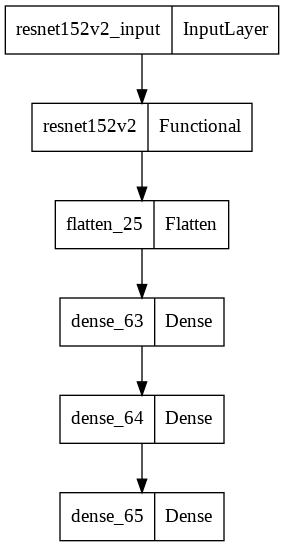

In [ ]:
plot_model(model, to_file='model.png')

Text(0.5, 1.0, 'Accuracy Curves')

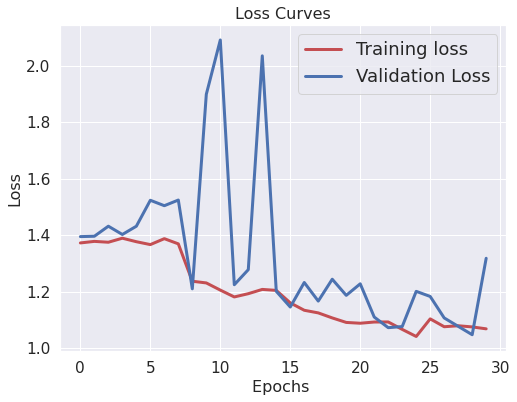

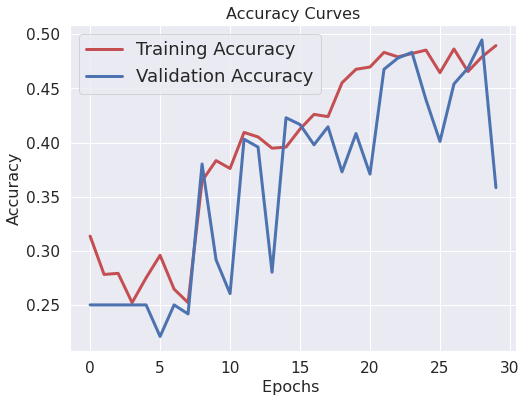

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

8/8 [==============================] - 4s 203ms/step - loss: 1.3378 - accuracy: 0.3500
Evaluation result on Test Data : Loss = 1.337754487991333, accuracy = 0.3499999940395355
